In [1]:
import pandas as pd
from novel_risk_assistant_only_select_choice import get_risk_3_type_to_risk_cat_dict

In [2]:
import os
import json

dir_path = os.getcwd()
risk_data_df_path = os.path.join(dir_path, "data/20240811_ALL_risks.xlsx")

risk_3_type_to_risk_cat_dict = get_risk_3_type_to_risk_cat_dict(risk_data_df_path)

In [3]:
# df_path = "/Users/ford/Documents/coding_trae/cro_rmi_improvement_feature/src/cro_rmi_improvement_feature/find_similar_risk/comparison_result_df_input_name_with_risk_cat.pkl"
# df_path = "/Users/ford/Documents/coding_trae/cro_rmi_improvement_feature/src/cro_rmi_improvement_feature/find_similar_risk/comparison_result_df_input_desc_with_risk_cat.pkl"
df_path = "/Users/ford/Documents/coding_trae/cro_rmi_improvement_feature/src/cro_rmi_improvement_feature/find_similar_risk/comparison_result_df_input_name_and_desc_with_risk_cat.pkl"
df = pd.read_pickle(df_path)
df = df.iloc[:, 1:]
# apply json.loads to sorted_similar_sentences
# df["sorted_similar_sentences"] = df["sorted_similar_sentences"].str.encode('utf-8').str.decode('unicode_escape')

# df["sorted_similar_sentences"] = df["sorted_similar_sentences"].apply(json.loads)
# # Method 1: Using raw string handling
# df["sorted_similar_sentences"] = df["sorted_similar_sentences"].str.encode().str.decode('unicode-escape', errors='ignore')
# df["sorted_similar_sentences"] = df["sorted_similar_sentences"].apply(json.loads)
df["candidate_sentences"] = df["candidate_sentences"].apply(json.dumps)

print(type(df["sorted_similar_sentences"][0]))
df.head()

<class 'list'>


,target_sentence,candidate_sentences,embedded_model,distance_method,sorted_similar_sentences,sorted_similar_sentences_indices,target_order_in_sorted_similar_sentences,customer_risk_cat,target_risk_cat
0,เครื่องจักรหรืออุปกรณ์ขัดข้องหรือเสียหาย,"[""\u0e01\u0e32\u0e23\u0e02\u0e32\u0e14\u0e41\u...",all-MiniLM-L6-v2,cosine,[ด้านความปลอดภัยและอาชีวอนามัยของพนักงาน ลูกค้...,"[50, 63, 147, 153, 127, 128, 129, 130, 131, 15...",119,Operational risk,Operational risk
1,เครื่องจักรหรืออุปกรณ์ขัดข้องหรือเสียหาย,"[""\u0e01\u0e32\u0e23\u0e02\u0e32\u0e14\u0e41\u...",all-MiniLM-L6-v2,euclidean,[ด้านความปลอดภัยและอาชีวอนามัยของพนักงาน ลูกค้...,"[50, 63, 147, 153, 127, 128, 129, 130, 131, 15...",119,Operational risk,Operational risk
2,เครื่องจักรหรืออุปกรณ์ขัดข้องหรือเสียหาย,"[""\u0e01\u0e32\u0e23\u0e02\u0e32\u0e14\u0e41\u...",all-mpnet-base-v2,cosine,[ด้านความปลอดภัยและอาชีวอนามัยของพนักงาน ลูกค้...,"[50, 63, 147, 153, 127, 128, 129, 130, 131, 15...",119,Operational risk,Operational risk
3,เครื่องจักรหรืออุปกรณ์ขัดข้องหรือเสียหาย,"[""\u0e01\u0e32\u0e23\u0e02\u0e32\u0e14\u0e41\u...",all-mpnet-base-v2,euclidean,[ด้านความปลอดภัยและอาชีวอนามัยของพนักงาน ลูกค้...,"[50, 63, 147, 153, 127, 128, 129, 130, 131, 15...",119,Operational risk,Operational risk
4,เครื่องจักรหรืออุปกรณ์ขัดข้องหรือเสียหาย,"[""\u0e01\u0e32\u0e23\u0e02\u0e32\u0e14\u0e41\u...",openai-small,cosine,"[เครื่องจักรหรืออุปกรณ์ขัดข้องหรือเสียหาย, เคร...","[8, 9, 57, 20, 95, 98, 27, 13, 39, 138, 23, 76...",1,Operational risk,Operational risk


In [4]:
# loop each row in df
df["filter_sorted_similar_sentences"] = None
df["target_order_in_filter_sorted_similar_sentences"] = None
for index, row in df.iterrows():
    new_sorted_similar_sentences = []
    target_risk_cat = row["target_risk_cat"]
    target_sentence = row["target_sentence"]
    # print(f"target_risk_cat: {target_risk_cat},{type(target_risk_cat)}")
    for sentence in row["sorted_similar_sentences"]:
        # print(sentence)
        current_risk_cat = risk_3_type_to_risk_cat_dict[sentence]
        if current_risk_cat == target_risk_cat:
            new_sorted_similar_sentences.append(sentence)
    # update new_sorted_similar_sentences to column filter_sorted_similar_sentences
    try:
        df.at[index, "filter_sorted_similar_sentences"] = new_sorted_similar_sentences
    except ValueError:
        print(f"ValueError: {new_sorted_similar_sentences}")
        print(f"target_risk_cat: {target_risk_cat}")
        print(f"index: {index}")
        print(f"row: {row}")
        raise
    # then update target_order_in_filter_sorted_similar_sentences
    target_order_in_filter_sorted_similar_sentences = (
        new_sorted_similar_sentences.index(target_sentence) + 1
    )
    df.at[index, "target_order_in_filter_sorted_similar_sentences"] = (
        target_order_in_filter_sorted_similar_sentences
    )

In [5]:
df.head()

,target_sentence,candidate_sentences,embedded_model,distance_method,sorted_similar_sentences,sorted_similar_sentences_indices,target_order_in_sorted_similar_sentences,customer_risk_cat,target_risk_cat,filter_sorted_similar_sentences,target_order_in_filter_sorted_similar_sentences
0,เครื่องจักรหรืออุปกรณ์ขัดข้องหรือเสียหาย,"[""\u0e01\u0e32\u0e23\u0e02\u0e32\u0e14\u0e41\u...",all-MiniLM-L6-v2,cosine,[ด้านความปลอดภัยและอาชีวอนามัยของพนักงาน ลูกค้...,"[50, 63, 147, 153, 127, 128, 129, 130, 131, 15...",119,Operational risk,Operational risk,[ด้านความปลอดภัยและอาชีวอนามัยของพนักงาน ลูกค้...,53
1,เครื่องจักรหรืออุปกรณ์ขัดข้องหรือเสียหาย,"[""\u0e01\u0e32\u0e23\u0e02\u0e32\u0e14\u0e41\u...",all-MiniLM-L6-v2,euclidean,[ด้านความปลอดภัยและอาชีวอนามัยของพนักงาน ลูกค้...,"[50, 63, 147, 153, 127, 128, 129, 130, 131, 15...",119,Operational risk,Operational risk,[ด้านความปลอดภัยและอาชีวอนามัยของพนักงาน ลูกค้...,53
2,เครื่องจักรหรืออุปกรณ์ขัดข้องหรือเสียหาย,"[""\u0e01\u0e32\u0e23\u0e02\u0e32\u0e14\u0e41\u...",all-mpnet-base-v2,cosine,[ด้านความปลอดภัยและอาชีวอนามัยของพนักงาน ลูกค้...,"[50, 63, 147, 153, 127, 128, 129, 130, 131, 15...",119,Operational risk,Operational risk,[ด้านความปลอดภัยและอาชีวอนามัยของพนักงาน ลูกค้...,53
3,เครื่องจักรหรืออุปกรณ์ขัดข้องหรือเสียหาย,"[""\u0e01\u0e32\u0e23\u0e02\u0e32\u0e14\u0e41\u...",all-mpnet-base-v2,euclidean,[ด้านความปลอดภัยและอาชีวอนามัยของพนักงาน ลูกค้...,"[50, 63, 147, 153, 127, 128, 129, 130, 131, 15...",119,Operational risk,Operational risk,[ด้านความปลอดภัยและอาชีวอนามัยของพนักงาน ลูกค้...,53
4,เครื่องจักรหรืออุปกรณ์ขัดข้องหรือเสียหาย,"[""\u0e01\u0e32\u0e23\u0e02\u0e32\u0e14\u0e41\u...",openai-small,cosine,"[เครื่องจักรหรืออุปกรณ์ขัดข้องหรือเสียหาย, เคร...","[8, 9, 57, 20, 95, 98, 27, 13, 39, 138, 23, 76...",1,Operational risk,Operational risk,"[เครื่องจักรหรืออุปกรณ์ขัดข้องหรือเสียหาย, เคร...",1


In [6]:
df.columns

Index(['target_sentence', 'candidate_sentences', 'embedded_model',
       'distance_method', 'sorted_similar_sentences',
       'sorted_similar_sentences_indices',
       'target_order_in_sorted_similar_sentences', 'customer_risk_cat',
       'target_risk_cat', 'filter_sorted_similar_sentences',
       'target_order_in_filter_sorted_similar_sentences'],
      dtype='object')

In [7]:
# is_same_risk_cat column check target_risk_cat == customer_risk_cat
df["is_same_risk_cat"] = df.apply(
    lambda x: 1 if x["target_risk_cat"] == x["customer_risk_cat"] else 0, axis=1
)
# show df that has is_same_risk_cat == 0
df[df["is_same_risk_cat"] == 0]

,target_sentence,candidate_sentences,embedded_model,distance_method,sorted_similar_sentences,sorted_similar_sentences_indices,target_order_in_sorted_similar_sentences,customer_risk_cat,target_risk_cat,filter_sorted_similar_sentences,target_order_in_filter_sorted_similar_sentences,is_same_risk_cat
126,กระบวนการทำงานไม่มีประสิทธิภาพ,"[""\u0e01\u0e32\u0e23\u0e02\u0e32\u0e14\u0e41\u...",all-MiniLM-L6-v2,cosine,[อุปกรณ์ที่เกี่ยวข้องกับไอที ขัดข้องหรือไม่สาม...,"[63, 147, 50, 109, 110, 111, 112, 108, 113, 11...",104,Liquidity Risk,Operational risk,[อุปกรณ์ที่เกี่ยวข้องกับไอที ขัดข้องหรือไม่สาม...,45,0
127,กระบวนการทำงานไม่มีประสิทธิภาพ,"[""\u0e01\u0e32\u0e23\u0e02\u0e32\u0e14\u0e41\u...",all-MiniLM-L6-v2,euclidean,[อุปกรณ์ที่เกี่ยวข้องกับไอที ขัดข้องหรือไม่สาม...,"[63, 147, 50, 109, 110, 111, 112, 108, 113, 11...",104,Liquidity Risk,Operational risk,[อุปกรณ์ที่เกี่ยวข้องกับไอที ขัดข้องหรือไม่สาม...,45,0
128,กระบวนการทำงานไม่มีประสิทธิภาพ,"[""\u0e01\u0e32\u0e23\u0e02\u0e32\u0e14\u0e41\u...",all-mpnet-base-v2,cosine,[อุปกรณ์ที่เกี่ยวข้องกับไอที ขัดข้องหรือไม่สาม...,"[63, 147, 50, 109, 110, 111, 112, 108, 113, 11...",104,Liquidity Risk,Operational risk,[อุปกรณ์ที่เกี่ยวข้องกับไอที ขัดข้องหรือไม่สาม...,45,0
129,กระบวนการทำงานไม่มีประสิทธิภาพ,"[""\u0e01\u0e32\u0e23\u0e02\u0e32\u0e14\u0e41\u...",all-mpnet-base-v2,euclidean,[อุปกรณ์ที่เกี่ยวข้องกับไอที ขัดข้องหรือไม่สาม...,"[63, 147, 50, 109, 110, 111, 112, 108, 113, 11...",104,Liquidity Risk,Operational risk,[อุปกรณ์ที่เกี่ยวข้องกับไอที ขัดข้องหรือไม่สาม...,45,0
130,กระบวนการทำงานไม่มีประสิทธิภาพ,"[""\u0e01\u0e32\u0e23\u0e02\u0e32\u0e14\u0e41\u...",openai-small,cosine,"[การจัดการโครงการไอทีที่ไม่มีประสิทธิภาพ, การบ...","[68, 65, 28, 60, 77, 159, 15, 31, 27, 29, 88, ...",19,Liquidity Risk,Operational risk,"[การจัดการโครงการไอทีที่ไม่มีประสิทธิภาพ, การบ...",16,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1921,การก่อความไม่สงบทางสังคม\nความวุ่นวายหรือความร...,"[""\u0e01\u0e32\u0e23\u0e02\u0e32\u0e14\u0e41\u...",all-MiniLM-L6-v2,euclidean,[ธุรกิจหยุดชะงักจากโรคระบาด\nการหยุดชะงักของธุ...,"[54, 162, 13, 159, 49, 46, 163, 104, 124, 132,...",61,Operational risk,Strategic Risk,[ภาวะโลกร้อน\nการเพิ่มขึ้นของอุณหภูมิเฉลี่ยของ...,30,0
1922,การก่อความไม่สงบทางสังคม\nความวุ่นวายหรือความร...,"[""\u0e01\u0e32\u0e23\u0e02\u0e32\u0e14\u0e41\u...",all-mpnet-base-v2,cosine,[ธุรกิจหยุดชะงักจากโรคระบาด\nการหยุดชะงักของธุ...,"[54, 162, 13, 159, 49, 46, 163, 104, 124, 132,...",61,Operational risk,Strategic Risk,[ภาวะโลกร้อน\nการเพิ่มขึ้นของอุณหภูมิเฉลี่ยของ...,30,0
1923,การก่อความไม่สงบทางสังคม\nความวุ่นวายหรือความร...,"[""\u0e01\u0e32\u0e23\u0e02\u0e32\u0e14\u0e41\u...",all-mpnet-base-v2,euclidean,[ธุรกิจหยุดชะงักจากโรคระบาด\nการหยุดชะงักของธุ...,"[54, 162, 13, 159, 49, 46, 163, 104, 124, 132,...",61,Operational risk,Strategic Risk,[ภาวะโลกร้อน\nการเพิ่มขึ้นของอุณหภูมิเฉลี่ยของ...,30,0
1924,การก่อความไม่สงบทางสังคม\nความวุ่นวายหรือความร...,"[""\u0e01\u0e32\u0e23\u0e02\u0e32\u0e14\u0e41\u...",openai-small,cosine,[ด้านความปลอดภัยและอาชีวอนามัยของพนักงาน ลูกค้...,"[50, 55, 56, 81, 163, 28, 68, 38, 162, 155, 65...",54,Operational risk,Strategic Risk,[การสูญเสียความหลากหลายทางชีวภาพ\nผลกระทบร้ายแ...,3,0


In [8]:
df.candidate_sentences.unique()[0]

'["\\u0e01\\u0e32\\u0e23\\u0e02\\u0e32\\u0e14\\u0e41\\u0e04\\u0e25\\u0e19\\u0e27\\u0e31\\u0e15\\u0e16\\u0e38\\u0e14\\u0e34\\u0e1a ", "\\u0e27\\u0e31\\u0e15\\u0e16\\u0e38\\u0e14\\u0e34\\u0e1a\\u0e44\\u0e21\\u0e48\\u0e44\\u0e14\\u0e49\\u0e04\\u0e38\\u0e13\\u0e20\\u0e32\\u0e1e", "\\u0e2d\\u0e33\\u0e19\\u0e32\\u0e08\\u0e15\\u0e48\\u0e2d\\u0e23\\u0e2d\\u0e07\\u0e01\\u0e31\\u0e1a\\u0e0b\\u0e31\\u0e1e\\u0e1e\\u0e25\\u0e32\\u0e22\\u0e40\\u0e2d\\u0e2d\\u0e23\\u0e4c\\u0e15\\u0e48\\u0e33", "\\u0e01\\u0e32\\u0e23\\u0e02\\u0e32\\u0e14\\u0e04\\u0e27\\u0e32\\u0e21\\u0e23\\u0e48\\u0e27\\u0e21\\u0e21\\u0e37\\u0e2d\\u0e20\\u0e32\\u0e22\\u0e43\\u0e19\\u0e2d\\u0e07\\u0e04\\u0e4c\\u0e01\\u0e23", "\\u0e01\\u0e23\\u0e30\\u0e1a\\u0e27\\u0e19\\u0e01\\u0e32\\u0e23\\u0e17\\u0e33\\u0e07\\u0e32\\u0e19\\u0e44\\u0e21\\u0e48\\u0e21\\u0e35\\u0e1b\\u0e23\\u0e30\\u0e2a\\u0e34\\u0e17\\u0e18\\u0e34\\u0e20\\u0e32\\u0e1e", "\\u0e01\\u0e32\\u0e23\\u0e02\\u0e32\\u0e14\\u0e1b\\u0e23\\u0e30\\u0e2a\\u0e34\\u0e17\\u0e18\\u0e34\\u

In [31]:
selected_df = df.copy()
embedded_model = "openai-small"
distance_method = "cosine"
selected_df = selected_df[selected_df["embedded_model"] == embedded_model]
selected_df = selected_df[selected_df["distance_method"] == distance_method]
selected_df = selected_df[selected_df["is_same_risk_cat"] == 1]
selected_df = selected_df[
    selected_df["candidate_sentences"] == df.candidate_sentences.unique()[2]
]
target_order_list = selected_df[
    "target_order_in_filter_sorted_similar_sentences"
].to_list()
print(selected_df.shape)
print(selected_df[selected_df["is_same_risk_cat"] == 0].shape)

(84, 12)
(0, 12)


In [32]:
# selected_df[selected_df["is_same_risk_cat"] == 0]

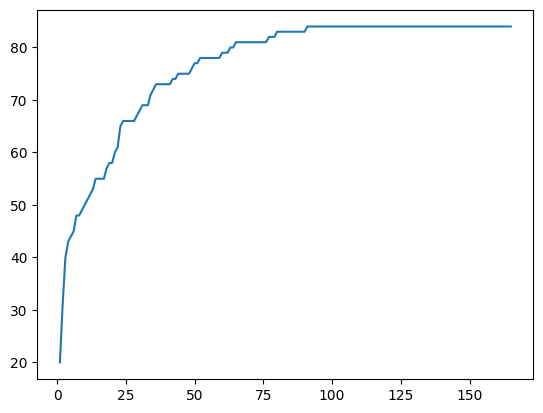

In [33]:
score_list = []
top_n_list = []
target_order_list
for top_n in range(1, 166):
    # score is count every element in target_order_list if it <= top_n  then + 1
    score = 0
    for target_order in target_order_list:
        if target_order <= top_n:
            score += 1
    score_list.append(score)
    top_n_list.append(top_n)
# plot xy x is top_n_list y is score_list
import matplotlib.pyplot as plt

plt.plot(top_n_list, score_list)
plt.show()

In [34]:
score_list[5] / 84 * 100

53.57142857142857

In [35]:
score_list[25] / 84 * 100

78.57142857142857

In [30]:
# filter missed matches
# input name
# output name, desc, name and desc
# top25
76.2, 75, 81.0

# top5
40.2, 50, 54.8

(40.2, 50, 54.8)

In [15]:
# filter missed matches
# input desc
# output name, desc, name and desc
# top25
75, 71.4, 81.0

# top5
52.4, 46.4, 53.6

(52.4, 46.4, 53.6)

In [ ]:
# filter missed matches
# input name and desc
# output name, desc, name and desc
# top25
72.6, 72.6, 78.6

# top5
53.6, 50, 53.6

In [16]:
# input name
# output name, desc, name and desc
# top25
76.6, 71.1, 78.5

# top5
50.5, 47.7, 53.3

(50.5, 47.7, 53.3)

In [17]:
# input desc
# output name, desc, name and desc
# top25
73.8, 69.2, 78.5

# top5
50.5, 43.9, 49.5

(50.5, 43.9, 49.5)

In [18]:
# input name and desc
# output name, desc, name and desc
# top25
73.8, 70.1, 76.6

# top5
52.3, 45.8, 52.3

(52.3, 45.8, 52.3)